In [2]:
#データをベクトル化する
#かつ、データについてshuffleする。
# -*- coding: utf-8 -*-
import math
import csv
import os
import json
import pickle
import random

shuffle_repeat = 100

def sentence_vectorize():
    
    #positive,negativeすべて合わせた文のインデックス用
    #後でシャッフル呼び出し時に用いる
    total_index = 0
    
    #positive,negative両方用
    all_sentence_vectorized = []
    #positive : sign =1, negative : sign = -1
    with open("./data/books/positive.review",mode = "r", encoding = "utf-8") as p:
        index = 0   #各文にインデックスを付ける。シャッフル呼び出し用
        positive = []
        for line in p:
            
            oneline = line.split(" ") #まだ　" " でsplitしただけ
            one_sentence = [0 for _ in range(200000)]  #これから一文をベクトル化する
            
            #一文内の各id:countに対する処理
            for one_id_count_set in oneline:
                id_,count_ = one_id_count_set.split(":")
                # 文末のid:count用
                count_ = count_.strip() 
                
                one_sentence[int(id_)] += int(count_) 

            #一文に対する処理　ここまで
            #one_sentenceを記録する、ただし、sign,indexをつける必要がある
            
            #sign, index用も込のリスト、すなわち
            #[ sign ,  index,  [ 200000次元のリスト ]]　とする。
            
            
            
            if index % 500 == 0:
                print(str(index) + " sentence is vectorised")
            
            positive.append(one_sentence)
                
            #各sentenceに固有
            index +=1
        # shuffle  
        for i in range(shuffle_repeat):
            positive = random.sample(positive,len(positive))
        with open("./positive.review.vector","wb") as pp:
            pickle.dump(positive,pp)
        
        #negative_dataの各文章に対するインデックス開始は1から
        #total_indexは全センテンス用
        total_index += index
        all_sentence_vectorized.append(positive)

    with open("./data/books/negative.review",mode = "r", encoding = "utf-8") as n:
        index = 0   #各文にインデックスを付ける。シャッフル呼び出し用
        negative = []
        for line in n:
            
            oneline = line.split(" ") #まだ　" " でsplitしただけ
            one_sentence = [0 for _ in range(200000)]  #これから一文をベクトル化する
            
            #一文内の各id:countに対する処理
            for one_id_count_set in oneline:
                id_,count_ = one_id_count_set.split(":")
                # 文末のid:count用
                count_ = count_.strip() 
                
                one_sentence[int(id_)] += int(count_) 
            #一文に対する処理　ここまで
            #one_sentenceを記録する、ただし、sign,indexをつける必要がある
            
            #sign, index用も込のリスト、すなわち
            #[ sign ,  index,  [ 200000次元のリスト ]]　とする。
            
            #sentence_to_be_recorded = [index,-1,one_sentence]
            
            if index % 500 == 0:
                print(str(index) + " sentence is vectorised")
            
            negative.append(one_sentence)
                
            #各sentenceに固有
            index +=1
            total_index +=1 
        for i in range(shuffle_repeat):
            negative = random.sample(negative,len(negative))
    all_sentence_vectorized.append(negative)
    
   
    with open("./negative.review.vector","wb") as nn:
            pickle.dump(negative,nn) 
            
        
    with open("./all_sentence_vectorised.vector","wb") as f:
        pickle.dump(all_sentence_vectorized,f)
        
    print(str(total_index) + " sentence is vectorised")
    
sentence_vectorize()

0 sentence is vectorised
500 sentence is vectorised
0 sentence is vectorised
500 sentence is vectorised
2000 sentence is vectorised


In [5]:
#split train=0.8, dev = 0.1, test = 0.1
#bias is needed

import random
import pickle

def data_spliter():
    p_train = []
    p_dev = []
    p_test = []
    
    n_train = []
    n_dev = []
    n_test = []
    
    with open("positive.review.vector","rb") as p:
        p_list = pickle.load(p)

        for i in range(len( p_list)):
            if i <800:
                p_train.append(p_list[i])
            elif i >= 800 and i <= 900:
                p_dev.append(p_list[i])
            else:
                p_test.append(p_list[i])
                
    with open("negative.review.vector","rb") as n:
        n_list = pickle.load(n)

        for i in range(len(n_list)):
            if i <800:
                n_train.append(n_list[i])
            elif i >= 800 and i < 900:
                n_dev.append(n_list[i])
            else:
                n_test.append(n_list[i])    
        
    with open("./train_dev_test/p_train","wb") as f:
        pickle.dump(p_train,f)

    with open("./train_dev_test/p_dev","wb") as f:
        pickle.dump(p_dev,f)

    with open("./train_dev_test/p_test","wb") as f:
        pickle.dump(p_test,f)
        
    with open("./train_dev_test/n_train","wb") as f:
        pickle.dump(n_train,f)

    with open("./train_dev_test/n_dev","wb") as f:
        pickle.dump(n_dev,f)

    with open("./train_dev_test/n_test","wb") as f:
        pickle.dump(n_test,f)
        
data_spliter()

In [1]:
#function
#データをベクトル化する
#かつ、データについてshuffleする。
# -*- coding: utf-8 -*-
import math
import csv
import os
import json
import pickle
import random

def sigmoid(xx):
    if xx > 0:
        return (1 / (1 + math.exp(-xx)))
    else:
        return (1 - 1 / (1 + math.exp(xx)))
        

def v_dot(list_x,list_y): #内積
    sums = 0
    for i in range(len(list_x)):
        sums+= list_x[i] * list_y[i]
    return sums

def v_plus(list_x,list_y):
    result = [0 for _ in range(len(list_x))]
    for i in range(len(list_x)):
        result[i] = list_x[i] + list_y[i]
    return result    

def v_minus(list_x,list_y):
    result = [0 for _ in range(len(list_x))]
    for i in range(len(list_x)):
        result[i] = list_x[i] - list_y[i]
    return result    

def v_a_fold(a,list_x): #vectorの定数倍
    for i in list_x:
        i = a * i
    return list_x


In [2]:
import numpy as np
np.random.choice([i for i in range(1000)],20)

array([712, 106, 743, 596,  15, 229, 456, 290, 376, 478, 104, 484, 692,
       977, 409, 949, 957, 304, 946, 967])

In [3]:
import random
import math
import numpy as np

def load_train(batch_size):
    p_ret = []
    n_ret = []
    p_index = np.random.choice([i for i in range(800)],batch_size)
    n_index = np.random.choice([i for i in range(800)],batch_size)
    with open("./train_dev_test/p_train","rb") as p:
        with open("./train_dev_test/n_train","rb") as n:
            p_train = pickle.load(p)
            n_train = pickle.load(n)
            
            for _ in p_index:
                p_ret.append(p_train[_])
                
            for _ in n_index:
                n_ret.append(n_train[_])
    return p_ret, n_ret



def training(w,b,p_batch,n_batch,learning_rate,mini_batch_size):
    ips = 10 ** (-7)
    
    loss = 0
    one_iter = np.array( [0 for i in range(200000)])
    one_b = 0
    
    # 1 epochの中でp_batch(size = load_batch), n_batch(size = load_batch) 取ってきて
    #　その中からランダムで　mini_batch　個のデータで　1epoch回す。
    
    """
    for batch in p_train_batchs :
        y = 1
        one_iter = v_plus(one_iter ,  v_a_fold(((-1) * (y) * sigmoid((-1) * y * np.dot(w,batch))),batch) )
        one_b = one_b + (-1) * y * 1 * sigmoid((-1) * y * np.dot(w,batch))
        loss += (-1) * math.log(ips + sigmoid(y * np.dot(w,one_iter) + b))    
        #w = np.add(w ,(-1)* (learning_rate / len(batch)) * one_iter)
        
    w = np.add(w, v_a_fold((-1)* (learning_rate / len(p_train_batchs)) , one_iter) )
    #b = np.add( b,  ((-1)* (learning_rate / len(batch)) )* one_b)
    bias = bias - ((-1)* (learning_rate / len(p_train_batchs)) )* one_b      
    print("Loss: " + str(loss))
    
    loss = 0
    one_iter = np.array( [0 for i in range(200000)])
    one_b = 0
    for batch in n_train_batchs :
        y = -1
        one_iter = v_plus(one_iter ,  v_a_fold(((-1) * (y) * sigmoid((-1) * y * np.dot(w,batch))),batch) )
        one_b = one_b + (-1) * y * 1 * sigmoid((-1) * y * np.dot(w,batch))
        loss += (-1) * math.log(ips + sigmoid(y * np.dot(w,one_iter) + b))    
    #w = np.add(w ,(-1)* (learning_rate / len(batch)) * one_iter) 
    w = np.add(w, v_a_fold((-1)* (learning_rate / len(n_train_batchs)) , one_iter) )
    #b = np.add( b,  ((-1)* (learning_rate / len(batch)) )* one_b)
    bias = bias - ((-1)* (learning_rate / len(n_train_batchs)) )* one_b      
    print("Loss: " + str(loss))    
    
    
    """
    #print("p_batch"+str(p_batch))

    indexed_sentence = []
    for sentence in p_batch:
        indexed_sentence.append([1,sentence])
        
    for sentence in n_batch:
        indexed_sentence.append([-1,sentence])
        
    batch_to_be_used_index = np.random.choice(len(indexed_sentence),mini_batch_size)
    batch_to_be_used = []
    for _ in batch_to_be_used_index:
        batch_to_be_used.append(indexed_sentence[_])
    
    #print(batch_to_be_used)
    Loss = 0
    delL_devide_delw = np.array([0 for _ in range(200000)])
    delL_devide_delw_for_b = 0
    
    """
    delL_devide_delw = -y * sigmoid(-y *( np.dot(w,x) + b)) * x
    delL_devide_delw_for_b  = (-y) * 1 * sigmoid(-y *( np.dot(w,x) + b))
    
    """
    #w,b  : fixed
    for pn_sentence in batch_to_be_used:
        y = pn_sentence[0]
        #print(y)
        x = pn_sentence[1]
        x = np.array(x)
        #print(x,len(w))
        delL_devide_delw = np.array(delL_devide_delw) + (-1) * y * sigmoid((-1) * (y) * (np.dot(w,x)) )* x
        delL_devide_delw_for_b += (-1) * y * sigmoid((-1) * (y) * (np.dot(w,x)) )* 1 # x内に成分1がappendされて,wxを考える
        Loss += (-1) * math.log(ips +sigmoid(y * np.dot(w,x)))
    #learning
    w = w - ( learning_rate / len(batch_to_be_used) ) * delL_devide_delw
    b  =  b -  ( learning_rate / len(batch_to_be_used) ) * delL_devide_delw_for_b
    Loss = Loss / len(batch_to_be_used)
    
    return w,b,Loss

In [4]:
def load_dev():
    p_dev = []
    n_dev = []
    with open("./train_dev_test/p_dev","rb") as p:
        with open("./train_dev_test/n_dev","rb") as n:
            p_dev = pickle.load(p)
            n_dev = pickle.load(n)
    return p_dev, n_dev
    
def accuracy_eval(w,b):
    p_dev,n_dev = load_dev()
    correct = 0
    all_count = 0
    
    for _ in p_dev:
        all_count += 1
        y_ = 1
        _ = np.array(_)
        if np.dot(w,_) + b >=0:
            correct += 1
    for _ in n_dev:
        all_count += 1
        y_ = -1
        _ = np.array(_)
        if ((np.dot(w,_) + b)) <0:
            correct += 1    
    accuracy = correct * 100 / all_count
    return accuracy

In [5]:
epoch_times =1000

load_batch = 100
mini_batch_size = 50
learning_rate = 5

w_tr = np.random.rand(200000)
b_tr = np.random.rand()

Loss_list = []
accuracy_list = []

for _ in range(epoch_times):
    p_trainbatch, n_trainbatch = load_train(load_batch)
    w_, b_, Loss = training(w_tr,b_tr, p_trainbatch,n_trainbatch,learning_rate,mini_batch_size)
    print("epoch" + str(_ + 1) + " end")
    print("Loss: "+str(Loss))
    accuracy = accuracy_eval( w_, b_ )
    print("accuracy: "+str(accuracy))
    w_tr = w_
    b_tr = b_
    Loss_list.append(Loss)
    accuracy_list.append(accuracy)
    
with open("./w_record_mb50_lr5","wb") as f:
    pickle.dump(w_tr,f)
    
with open("./b_record_mb50_lr5","wb") as f:
    pickle.dump(b_tr,f)

with open("./record/acc_record_mb50_lr5","wb") as f:
    pickle.dump(accuracy_list,f)
    
with open("./record/loss_record_mb50_lr5","wb") as f:
    pickle.dump(Loss_list,f)
    
import numpy as np
import matplotlib.pyplot as plt
plt.plot(Loss_list)
plt.show()
#Loss
plt.figure()
plt.plot(accuracy_list)
plt.show()
#accuracy

epoch1 end
Loss: 7.962029173703565
accuracy: 54.22885572139303
epoch2 end
Loss: 5.5867632060697066
accuracy: 62.6865671641791
epoch3 end
Loss: 6.1163359232455585
accuracy: 61.19402985074627
epoch4 end
Loss: 5.0619494431182
accuracy: 63.18407960199005
epoch5 end
Loss: 5.819230324396297
accuracy: 64.17910447761194
epoch6 end
Loss: 5.83538647244822
accuracy: 62.6865671641791
epoch7 end
Loss: 4.851152869627424
accuracy: 64.17910447761194
epoch8 end
Loss: 5.772290323459435
accuracy: 64.17910447761194
epoch9 end
Loss: 3.6911576906934074
accuracy: 69.1542288557214
epoch10 end
Loss: 4.143243806755652
accuracy: 55.223880597014926
epoch11 end
Loss: 6.025001663787812
accuracy: 65.67164179104478
epoch12 end
Loss: 5.618117940047482
accuracy: 51.243781094527364
epoch13 end
Loss: 6.696929614590365
accuracy: 67.66169154228855
epoch14 end
Loss: 4.043519149725492
accuracy: 59.20398009950249
epoch15 end
Loss: 5.594098679096159
accuracy: 56.71641791044776
epoch16 end
Loss: 6.2039720839973915
accuracy: 68.

accuracy: 75.12437810945273
epoch128 end
Loss: 0.3993125523991538
accuracy: 72.13930348258707
epoch129 end
Loss: 0.7850848423800351
accuracy: 73.6318407960199
epoch130 end
Loss: 0.18331472628309442
accuracy: 73.6318407960199
epoch131 end
Loss: 1.4448888151752806
accuracy: 73.13432835820896
epoch132 end
Loss: 0.43849733000460617
accuracy: 77.11442786069652
epoch133 end
Loss: 0.41339685159325584
accuracy: 79.1044776119403
epoch134 end
Loss: 0.6596089460465185
accuracy: 71.64179104477611
epoch135 end
Loss: 0.1401873623965003
accuracy: 74.6268656716418
epoch136 end
Loss: 0.8613409122382943
accuracy: 76.11940298507463
epoch137 end
Loss: 0.4406864732542373
accuracy: 81.09452736318408
epoch138 end
Loss: 0.0007314189368019544
accuracy: 81.09452736318408
epoch139 end
Loss: 0.15139993038180047
accuracy: 77.61194029850746
epoch140 end
Loss: 0.22288213354413455
accuracy: 79.1044776119403
epoch141 end
Loss: 0.4723811689413308
accuracy: 79.60199004975124
epoch142 end
Loss: 0.006092375505245752
accur

accuracy: 77.61194029850746
epoch250 end
Loss: 0.0003587494532815001
accuracy: 77.61194029850746
epoch251 end
Loss: 0.003008697432964239
accuracy: 77.61194029850746
epoch252 end
Loss: 0.0011782341626833841
accuracy: 77.61194029850746
epoch253 end
Loss: 0.0011760871454384
accuracy: 77.61194029850746
epoch254 end
Loss: 0.00013530011867912402
accuracy: 77.61194029850746
epoch255 end
Loss: 0.0037244846468290197
accuracy: 77.11442786069652
epoch256 end
Loss: 0.002380647632198151
accuracy: 77.11442786069652
epoch257 end
Loss: 0.0006194747667347747
accuracy: 77.61194029850746
epoch258 end
Loss: 0.0022410996630297057
accuracy: 77.61194029850746
epoch259 end
Loss: 0.0024092499518027846
accuracy: 77.61194029850746
epoch260 end
Loss: 0.0026155495700686325
accuracy: 77.61194029850746
epoch261 end
Loss: 0.0018285314459909915
accuracy: 77.61194029850746
epoch262 end
Loss: 0.0019593428340713122
accuracy: 78.1094527363184
epoch263 end
Loss: 7.781358967654672e-05
accuracy: 78.1094527363184
epoch264 end

accuracy: 79.1044776119403
epoch370 end
Loss: 0.0004939576820604722
accuracy: 79.1044776119403
epoch371 end
Loss: 0.014934557334221301
accuracy: 79.1044776119403
epoch372 end
Loss: 0.0030222821154064373
accuracy: 79.1044776119403
epoch373 end
Loss: 0.0007158517904459874
accuracy: 79.1044776119403
epoch374 end
Loss: 0.0008703334009880803
accuracy: 79.1044776119403
epoch375 end
Loss: 0.005214572170642365
accuracy: 79.1044776119403
epoch376 end
Loss: 0.000332164744726873
accuracy: 79.1044776119403
epoch377 end
Loss: 0.00042570567958938115
accuracy: 79.1044776119403
epoch378 end
Loss: 0.003374311495357718
accuracy: 79.1044776119403
epoch379 end
Loss: 0.0013846481780177672
accuracy: 79.1044776119403
epoch380 end
Loss: 0.0011183051151683343
accuracy: 79.1044776119403
epoch381 end
Loss: 0.04230948028264664
accuracy: 79.1044776119403
epoch382 end
Loss: 0.01618135489202459
accuracy: 79.1044776119403
epoch383 end
Loss: 6.028405527191702e-06
accuracy: 79.1044776119403
epoch384 end
Loss: 0.0021467

accuracy: 79.1044776119403
epoch491 end
Loss: 0.000304913152714875
accuracy: 79.1044776119403
epoch492 end
Loss: 0.0012999225023909166
accuracy: 79.1044776119403
epoch493 end
Loss: 0.00033182290056486396
accuracy: 79.1044776119403
epoch494 end
Loss: 0.0002546906243708297
accuracy: 79.1044776119403
epoch495 end
Loss: 0.0003756997098170895
accuracy: 79.1044776119403
epoch496 end
Loss: 0.0008196494444538502
accuracy: 79.1044776119403
epoch497 end
Loss: 0.0006238821964310483
accuracy: 79.1044776119403
epoch498 end
Loss: 0.0003454361495008357
accuracy: 79.1044776119403
epoch499 end
Loss: 0.00034878482569700007
accuracy: 79.1044776119403
epoch500 end
Loss: 0.0006208474798283307
accuracy: 79.1044776119403
epoch501 end
Loss: 0.01088677542899259
accuracy: 79.1044776119403
epoch502 end
Loss: 0.0001441023238478131
accuracy: 79.1044776119403
epoch503 end
Loss: 0.0003821856863772615
accuracy: 79.1044776119403
epoch504 end
Loss: 0.0003962198892806596
accuracy: 79.1044776119403
epoch505 end
Loss: 0.0

epoch611 end
Loss: 0.00036406908925133756
accuracy: 79.1044776119403
epoch612 end
Loss: 0.0001355077164633645
accuracy: 79.1044776119403
epoch613 end
Loss: 0.0005011375636836548
accuracy: 79.1044776119403
epoch614 end
Loss: 0.0005629385207489241
accuracy: 79.1044776119403
epoch615 end
Loss: 0.0005158063970751019
accuracy: 79.1044776119403
epoch616 end
Loss: 8.792521013653921e-05
accuracy: 79.1044776119403
epoch617 end
Loss: 6.503315003410324e-05
accuracy: 79.1044776119403
epoch618 end
Loss: 0.0004030141778467596
accuracy: 79.1044776119403
epoch619 end
Loss: 6.156474257397477e-05
accuracy: 79.1044776119403
epoch620 end
Loss: 0.0002529247715075232
accuracy: 79.1044776119403
epoch621 end
Loss: 0.00075375636030256
accuracy: 79.1044776119403
epoch622 end
Loss: 0.0005394463146455807
accuracy: 79.1044776119403
epoch623 end
Loss: 0.0009352257543984712
accuracy: 79.1044776119403
epoch624 end
Loss: 0.00029492240784660917
accuracy: 79.1044776119403
epoch625 end
Loss: 0.0007743649601135631
accurac

accuracy: 79.1044776119403
epoch732 end
Loss: 0.0007578550853407963
accuracy: 79.1044776119403
epoch733 end
Loss: 0.0003004361301743145
accuracy: 79.1044776119403
epoch734 end
Loss: 0.0004335418322028856
accuracy: 79.1044776119403
epoch735 end
Loss: 0.0003553749248409088
accuracy: 79.1044776119403
epoch736 end
Loss: 0.000589763637058457
accuracy: 79.1044776119403
epoch737 end
Loss: 0.0006734402418062301
accuracy: 79.1044776119403
epoch738 end
Loss: 0.0004007041892837872
accuracy: 79.1044776119403
epoch739 end
Loss: 0.0010675645861385082
accuracy: 79.1044776119403
epoch740 end
Loss: 5.71608208122523e-05
accuracy: 79.1044776119403
epoch741 end
Loss: 0.000167383243887732
accuracy: 79.1044776119403
epoch742 end
Loss: 0.0005187723055909916
accuracy: 79.1044776119403
epoch743 end
Loss: 0.00019622291744732492
accuracy: 79.1044776119403
epoch744 end
Loss: 0.00022072262713320032
accuracy: 79.1044776119403
epoch745 end
Loss: 5.454539640094202e-05
accuracy: 79.1044776119403
epoch746 end
Loss: 0.0

accuracy: 79.1044776119403
epoch852 end
Loss: 0.00020807258216875253
accuracy: 79.1044776119403
epoch853 end
Loss: 0.0001406264562006845
accuracy: 79.1044776119403
epoch854 end
Loss: 0.00015696518916622537
accuracy: 79.1044776119403
epoch855 end
Loss: 0.0007564062946761825
accuracy: 79.1044776119403
epoch856 end
Loss: 0.00031705529713864334
accuracy: 79.1044776119403
epoch857 end
Loss: 0.0005592232496100122
accuracy: 79.1044776119403
epoch858 end
Loss: 1.8629821916639039e-06
accuracy: 79.1044776119403
epoch859 end
Loss: 0.00026271241616702664
accuracy: 79.1044776119403
epoch860 end
Loss: 0.00011166461206207554
accuracy: 79.1044776119403
epoch861 end
Loss: 0.0009828224973740833
accuracy: 79.1044776119403
epoch862 end
Loss: 0.0003302545573841667
accuracy: 79.1044776119403
epoch863 end
Loss: 1.2634799428991995e-05
accuracy: 79.1044776119403
epoch864 end
Loss: 0.00039021879466929294
accuracy: 79.1044776119403
epoch865 end
Loss: 0.000146505344666272
accuracy: 79.1044776119403
epoch866 end
L

epoch972 end
Loss: 0.0002524583629268483
accuracy: 79.1044776119403
epoch973 end
Loss: 0.000335407494322377
accuracy: 79.1044776119403
epoch974 end
Loss: 0.00017603379181903037
accuracy: 79.1044776119403
epoch975 end
Loss: 0.00036517605329149534
accuracy: 79.1044776119403
epoch976 end
Loss: 0.00012889707443446607
accuracy: 79.1044776119403
epoch977 end
Loss: 0.00023397774978238848
accuracy: 79.1044776119403
epoch978 end
Loss: 0.00030423926787415817
accuracy: 79.1044776119403
epoch979 end
Loss: 0.00022595736953222006
accuracy: 79.1044776119403
epoch980 end
Loss: 0.00022703233984066324
accuracy: 79.1044776119403
epoch981 end
Loss: 0.0002687324717061104
accuracy: 79.1044776119403
epoch982 end
Loss: 0.000456292142684082
accuracy: 79.1044776119403
epoch983 end
Loss: 0.00022902247625855443
accuracy: 79.1044776119403
epoch984 end
Loss: 1.9975543456522867e-05
accuracy: 79.1044776119403
epoch985 end
Loss: 0.00029007317824768735
accuracy: 79.1044776119403
epoch986 end
Loss: 0.0007386307824671834

<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

epoch1 end
Loss: 7.371001743265582
accuracy: 50.24875621890547
epoch2 end
Loss: 8.019818459839122
accuracy: 50.24875621890547
epoch3 end
Loss: 8.69476592608242
accuracy: 50.24875621890547
epoch4 end
Loss: 9.026131679106635
accuracy: 50.24875621890547
epoch5 end
Loss: 7.911040927291868
accuracy: 50.24875621890547
epoch6 end
Loss: 8.703757825283827
accuracy: 50.24875621890547
epoch7 end
Loss: 7.736692023797758
accuracy: 50.24875621890547
epoch8 end
Loss: 8.7728253399658
accuracy: 50.24875621890547
epoch9 end
Loss: 7.53478581890732
accuracy: 50.24875621890547
epoch10 end
Loss: 7.242713627509817
accuracy: 50.24875621890547
epoch11 end
Loss: 8.491332830380884
accuracy: 50.74626865671642
epoch12 end
Loss: 7.402091396343277
accuracy: 50.74626865671642
epoch13 end
Loss: 7.631546211722288
accuracy: 50.74626865671642
epoch14 end
Loss: 9.153494435317722
accuracy: 51.74129353233831
epoch15 end
Loss: 6.18200297404179
accuracy: 52.7363184079602
epoch16 end
Loss: 6.798142247210859
accuracy: 52.238805

epoch129 end
Loss: 7.892413760888403
accuracy: 64.67661691542288
epoch130 end
Loss: 5.148541877991348
accuracy: 65.17412935323384
epoch131 end
Loss: 4.223043903015946
accuracy: 64.67661691542288
epoch132 end
Loss: 4.87803084170843
accuracy: 64.67661691542288
epoch133 end
Loss: 5.063171580095262
accuracy: 65.17412935323384
epoch134 end
Loss: 5.158682135444836
accuracy: 64.67661691542288
epoch135 end
Loss: 4.938116439947293
accuracy: 64.67661691542288
epoch136 end
Loss: 5.897019878090423
accuracy: 65.17412935323384
epoch137 end
Loss: 3.3580404938400363
accuracy: 65.67164179104478
epoch138 end
Loss: 3.272214050002956
accuracy: 65.67164179104478
epoch139 end
Loss: 4.267847745272307
accuracy: 66.66666666666667
epoch140 end
Loss: 5.519175059862557
accuracy: 65.67164179104478
epoch141 end
Loss: 5.620494508601713
accuracy: 67.16417910447761
epoch142 end
Loss: 4.938898244272417
accuracy: 67.66169154228855
epoch143 end
Loss: 4.500098145797996
accuracy: 67.66169154228855
epoch144 end
Loss: 4.0305

epoch255 end
Loss: 3.613242293129453
accuracy: 69.65174129353234
epoch256 end
Loss: 2.039429292485426
accuracy: 68.65671641791045
epoch257 end
Loss: 2.4470433487309706
accuracy: 69.1542288557214
epoch258 end
Loss: 3.701633522044342
accuracy: 68.65671641791045
epoch259 end
Loss: 4.15247120906517
accuracy: 69.1542288557214
epoch260 end
Loss: 3.990334603763708
accuracy: 68.65671641791045
epoch261 end
Loss: 3.1435598037704273
accuracy: 68.65671641791045
epoch262 end
Loss: 4.0321344739511655
accuracy: 69.65174129353234
epoch263 end
Loss: 2.274338630030268
accuracy: 69.65174129353234
epoch264 end
Loss: 4.051412943506852
accuracy: 69.1542288557214
epoch265 end
Loss: 2.9885826523640526
accuracy: 69.1542288557214
epoch266 end
Loss: 2.061082175827817
accuracy: 69.1542288557214
epoch267 end
Loss: 4.587134513990252
accuracy: 69.65174129353234
epoch268 end
Loss: 3.888618265137859
accuracy: 69.65174129353234
epoch269 end
Loss: 2.1176924256125043
accuracy: 69.65174129353234
epoch270 end
Loss: 2.38858

accuracy: 73.13432835820896
epoch381 end
Loss: 4.015312320050708
accuracy: 73.13432835820896
epoch382 end
Loss: 1.951010357478701
accuracy: 73.13432835820896
epoch383 end
Loss: 1.1515775549455731
accuracy: 73.13432835820896
epoch384 end
Loss: 2.5148926379935244
accuracy: 70.64676616915423
epoch385 end
Loss: 1.5311421211594578
accuracy: 70.64676616915423
epoch386 end
Loss: 1.910255410145501
accuracy: 70.14925373134328
epoch387 end
Loss: 2.0122325549413236
accuracy: 71.14427860696517
epoch388 end
Loss: 2.3173039785413794
accuracy: 72.13930348258707
epoch389 end
Loss: 1.5178598718379233
accuracy: 71.64179104477611
epoch390 end
Loss: 3.134893826170354
accuracy: 71.14427860696517
epoch391 end
Loss: 1.8857375332723214
accuracy: 73.13432835820896
epoch392 end
Loss: 2.2227003552155895
accuracy: 73.6318407960199
epoch393 end
Loss: 2.0926767915608457
accuracy: 73.6318407960199
epoch394 end
Loss: 1.0209492865723215
accuracy: 73.6318407960199
epoch395 end
Loss: 1.4315567909633233
accuracy: 73.6318

epoch506 end
Loss: 1.3266869213636776
accuracy: 73.13432835820896
epoch507 end
Loss: 1.0232971581114427
accuracy: 73.6318407960199
epoch508 end
Loss: 0.852986291800487
accuracy: 74.12935323383084
epoch509 end
Loss: 1.5726196409414523
accuracy: 73.13432835820896
epoch510 end
Loss: 2.129964953869323
accuracy: 74.12935323383084
epoch511 end
Loss: 0.3785569501703167
accuracy: 74.12935323383084
epoch512 end
Loss: 1.3741359706894969
accuracy: 74.12935323383084
epoch513 end
Loss: 1.3488703269095321
accuracy: 73.6318407960199
epoch514 end
Loss: 1.9521992772119265
accuracy: 73.6318407960199
epoch515 end
Loss: 1.9780004635458661
accuracy: 73.6318407960199
epoch516 end
Loss: 2.3790677351226854
accuracy: 73.6318407960199
epoch517 end
Loss: 0.8367940645286663
accuracy: 73.6318407960199
epoch518 end
Loss: 0.18274878416939816
accuracy: 73.6318407960199
epoch519 end
Loss: 1.1531141335195942
accuracy: 73.6318407960199
epoch520 end
Loss: 0.06650709555322572
accuracy: 73.6318407960199
epoch521 end
Loss: 

accuracy: 74.12935323383084
epoch632 end
Loss: 0.9415158505876144
accuracy: 73.13432835820896
epoch633 end
Loss: 0.3017438060597061
accuracy: 73.6318407960199
epoch634 end
Loss: 0.649084262472754
accuracy: 73.13432835820896
epoch635 end
Loss: 2.0993425842265547
accuracy: 73.13432835820896
epoch636 end
Loss: 1.5110288831707204
accuracy: 73.13432835820896
epoch637 end
Loss: 1.7537653357638396
accuracy: 73.13432835820896
epoch638 end
Loss: 1.054795142819714
accuracy: 73.13432835820896
epoch639 end
Loss: 1.1367665353792513
accuracy: 73.13432835820896
epoch640 end
Loss: 1.4853793346645308
accuracy: 73.13432835820896
epoch641 end
Loss: 0.7419608744354224
accuracy: 73.13432835820896
epoch642 end
Loss: 2.20486179948954
accuracy: 73.6318407960199
epoch643 end
Loss: 0.5834698785417864
accuracy: 73.6318407960199
epoch644 end
Loss: 2.6739322741686053
accuracy: 73.6318407960199
epoch645 end
Loss: 1.2245137527728502
accuracy: 73.6318407960199
epoch646 end
Loss: 2.2509454695077062
accuracy: 74.129353

accuracy: 73.6318407960199
epoch757 end
Loss: 0.890402699605641
accuracy: 73.6318407960199
epoch758 end
Loss: 0.09577923722753157
accuracy: 73.6318407960199
epoch759 end
Loss: 0.6618295761585452
accuracy: 73.6318407960199
epoch760 end
Loss: 0.3380982947543877
accuracy: 73.6318407960199
epoch761 end
Loss: 1.3297070517059095
accuracy: 73.6318407960199
epoch762 end
Loss: 0.09613623019711802
accuracy: 73.6318407960199
epoch763 end
Loss: 1.1145020383582511
accuracy: 73.6318407960199
epoch764 end
Loss: 0.9647055061880419
accuracy: 73.6318407960199
epoch765 end
Loss: 0.10274484313066257
accuracy: 73.6318407960199
epoch766 end
Loss: 0.7020419179474611
accuracy: 73.6318407960199
epoch767 end
Loss: 1.154818409765875
accuracy: 73.6318407960199
epoch768 end
Loss: 0.14432302067061747
accuracy: 73.6318407960199
epoch769 end
Loss: 0.7689380568314348
accuracy: 73.6318407960199
epoch770 end
Loss: 1.0609842247235954
accuracy: 73.6318407960199
epoch771 end
Loss: 0.6721191988903362
accuracy: 73.6318407960

epoch882 end
Loss: 0.40878010332407066
accuracy: 74.12935323383084
epoch883 end
Loss: 0.8301542447445628
accuracy: 74.12935323383084
epoch884 end
Loss: 0.2574285081020557
accuracy: 74.12935323383084
epoch885 end
Loss: 1.2255588509349251
accuracy: 74.12935323383084
epoch886 end
Loss: 0.44830714723967596
accuracy: 74.12935323383084
epoch887 end
Loss: 0.32145097943977957
accuracy: 73.6318407960199
epoch888 end
Loss: 0.5199164451986286
accuracy: 73.6318407960199
epoch889 end
Loss: 0.09307306122501162
accuracy: 73.6318407960199
epoch890 end
Loss: 0.41358496469109673
accuracy: 73.6318407960199
epoch891 end
Loss: 1.1953103800500182
accuracy: 73.6318407960199
epoch892 end
Loss: 0.7336580485171855
accuracy: 74.12935323383084
epoch893 end
Loss: 0.5014814072706307
accuracy: 74.12935323383084
epoch894 end
Loss: 0.8263287261686003
accuracy: 74.12935323383084
epoch895 end
Loss: 0.9451805683093846
accuracy: 74.12935323383084
epoch896 end
Loss: 0.7248934543717042
accuracy: 74.6268656716418
epoch897 en

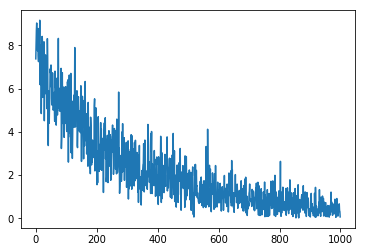

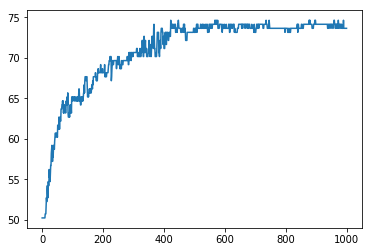

In [6]:
epoch_times =1000

load_batch = 100
mini_batch_size = 50
learning_rate = 0.2

w_tr = np.random.rand(200000)
b_tr = np.random.rand()

Loss_list = []
accuracy_list =[]

for _ in range(epoch_times):
    p_trainbatch, n_trainbatch = load_train(load_batch)
    w_, b_, Loss = training(w_tr,b_tr, p_trainbatch,n_trainbatch,learning_rate,mini_batch_size)
    Loss_list.append(Loss)
    print("epoch" + str(_ + 1) + " end")
    print("Loss: "+str(Loss))
    accuracy = accuracy_eval( w_, b_ )
    print("accuracy: "+str(accuracy))
    accuracy_list.append(accuracy)
    w_tr = w_
    b_tr = b_
    
with open("./record/w_record_mb50_lr0p2","wb") as f:
    pickle.dump(w_tr,f)
    
with open("./record/b_record_mb50_lr0p2","wb") as f:
    pickle.dump(b_tr,f)

with open("./record/acc_record_mb50_lr0p2","wb") as f:
    pickle.dump(accuracy_list,f)
    
with open("./record/loss_record_mb50_lr0p2","wb") as f:
    pickle.dump(Loss_list,f)
    
import numpy as np
import matplotlib.pyplot as plt
plt.plot(Loss_list)
plt.show()
#Loss
plt.figure()
plt.plot(accuracy_list)
plt.show()
#accuracy

In [ ]:
epoch_times =5000

load_batch = 100
mini_batch_size = 50
learning_rate = 10

w_tr = np.random.rand(200000)
b_tr = np.random.rand()

Loss_list_ = []
accuracy_list_ = []

for _ in range(epoch_times):
    p_trainbatch, n_trainbatch = load_train(load_batch)
    w_, b_, Loss = training(w_tr,b_tr, p_trainbatch,n_trainbatch,learning_rate,mini_batch_size)
    print("epoch" + str(_ + 1) + " end")
    print("Loss: "+str(Loss))
    accuracy = accuracy_eval( w_, b_ )
    print("accuracy: "+str(accuracy))
    w_tr = w_
    b_tr = b_
    Loss_list_.append(Loss)
    accuracy_list_.append(accuracy)
    
with open("./w_record_mb50_lr10_ep5000","wb") as f:
    pickle.dump(w_tr,f)
    
with open("./b_record_mb50_lr10_ep5000","wb") as f:
    pickle.dump(b_tr,f)

with open("./record/acc_record_mb50_lr10_ep5000","wb") as f:
    pickle.dump(accuracy_list_,f)
    
with open("./record/loss_record_mb50_lr10_ep5000","wb") as f:
    pickle.dump(Loss_list_,f)
    
import numpy as np
import matplotlib.pyplot as plt
plt.plot(Loss_list_)
plt.show()
#Loss
plt.figure()
plt.plot(accuracy_list_)
plt.show()
#accuracy

epoch1 end
Loss: 7.414319435318874
accuracy: 58.70646766169154
epoch2 end
Loss: 4.695146758292777
accuracy: 50.24875621890547
epoch3 end
Loss: 6.12349679397371
accuracy: 56.21890547263681
epoch4 end
Loss: 6.623332517268961
accuracy: 53.233830845771145
epoch5 end
Loss: 8.903222068814618
accuracy: 51.74129353233831
epoch6 end
Loss: 7.695476892961182
accuracy: 62.6865671641791
epoch7 end
Loss: 4.583965639630935
accuracy: 61.19402985074627
epoch8 end
Loss: 5.344235303680083
accuracy: 55.223880597014926
epoch9 end
Loss: 7.303883356034837
accuracy: 64.67661691542288
epoch10 end
Loss: 5.146043800712153
accuracy: 63.681592039801
epoch11 end
Loss: 6.444077146249245
accuracy: 60.69651741293532
epoch12 end
Loss: 4.740890543583755
accuracy: 52.7363184079602
epoch13 end
Loss: 6.830294595385016
accuracy: 73.13432835820896
epoch14 end
Loss: 2.6381001622549913
accuracy: 57.21393034825871
epoch15 end
Loss: 6.1098661530926925
accuracy: 59.20398009950249
epoch16 end
Loss: 5.923754377361317
accuracy: 55.2

accuracy: 79.1044776119403
epoch128 end
Loss: 0.4541653734971486
accuracy: 77.11442786069652
epoch129 end
Loss: 0.3223714268848065
accuracy: 77.61194029850746
epoch130 end
Loss: 0.0004524222830977564
accuracy: 77.61194029850746
epoch131 end
Loss: 0.8112491288209739
accuracy: 78.1094527363184
epoch132 end
Loss: 0.02107740651843192
accuracy: 76.61691542288557
epoch133 end
Loss: 0.6542649388703968
accuracy: 78.1094527363184
epoch134 end
Loss: 0.1509896005452484
accuracy: 77.61194029850746
epoch135 end
Loss: 0.002288234414564565
accuracy: 78.60696517412936
epoch136 end
Loss: 6.15943835593897e-05
accuracy: 78.60696517412936
epoch137 end
Loss: 0.2937046456571929
accuracy: 79.1044776119403
epoch138 end
Loss: 0.6121571874889421
accuracy: 79.60199004975124
epoch139 end
Loss: 0.04834350929730061
accuracy: 80.09950248756219
epoch140 end
Loss: 0.0049940851744062304
accuracy: 80.09950248756219
epoch141 end
Loss: 0.8907638388864111
accuracy: 79.1044776119403
epoch142 end
Loss: 0.14387240963466572
ac

epoch249 end
Loss: 0.0012958090621299856
accuracy: 78.60696517412936
epoch250 end
Loss: 0.014418567876738618
accuracy: 79.1044776119403
epoch251 end
Loss: 7.127361525013534e-05
accuracy: 79.1044776119403
epoch252 end
Loss: 1.227623384180606e-05
accuracy: 79.1044776119403
epoch253 end
Loss: 0.028870218392951338
accuracy: 79.1044776119403
epoch254 end
Loss: 1.0106112392055633e-05
accuracy: 79.1044776119403
epoch255 end
Loss: 0.001127589480627303
accuracy: 79.1044776119403
epoch256 end
Loss: 0.00010433136396081993
accuracy: 79.1044776119403
epoch257 end
Loss: 0.047115334879138014
accuracy: 79.60199004975124
epoch258 end
Loss: 3.958397112899689e-06
accuracy: 79.60199004975124
epoch259 end
Loss: 0.0007797702998727869
accuracy: 79.60199004975124
epoch260 end
Loss: 3.8111558948377e-06
accuracy: 79.60199004975124
epoch261 end
Loss: 0.001204338650412412
accuracy: 79.60199004975124
epoch262 end
Loss: 0.0013047379339364638
accuracy: 79.60199004975124
epoch263 end
Loss: 0.0006764263216120333
accur